In [1]:
import fastai.vision as vs
from fastai.metrics import error_rate

In [2]:
path = vs.untar_data(vs.URLs.CIFAR)

In [3]:
path

PosixPath('/home/jupyter/.fastai/data/cifar10')

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/cifar10/labels.txt'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/test'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train')]

In [5]:
tfms = vs.get_transforms()
images = vs.ImageDataBunch.from_folder(path,ds_tfms=tfms,size=224,bs=64,valid_pct=0.2,seed=1,test='test').normalize(vs.imagenet_stats)

In [7]:
images

ImageDataBunch;

Train: LabelList (40000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
ship,ship,ship,ship,ship
Path: /home/jupyter/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
frog,truck,dog,automobile,bird
Path: /home/jupyter/.fastai/data/cifar10;

Test: LabelList (10000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /home/jupyter/.fastai/data/cifar10

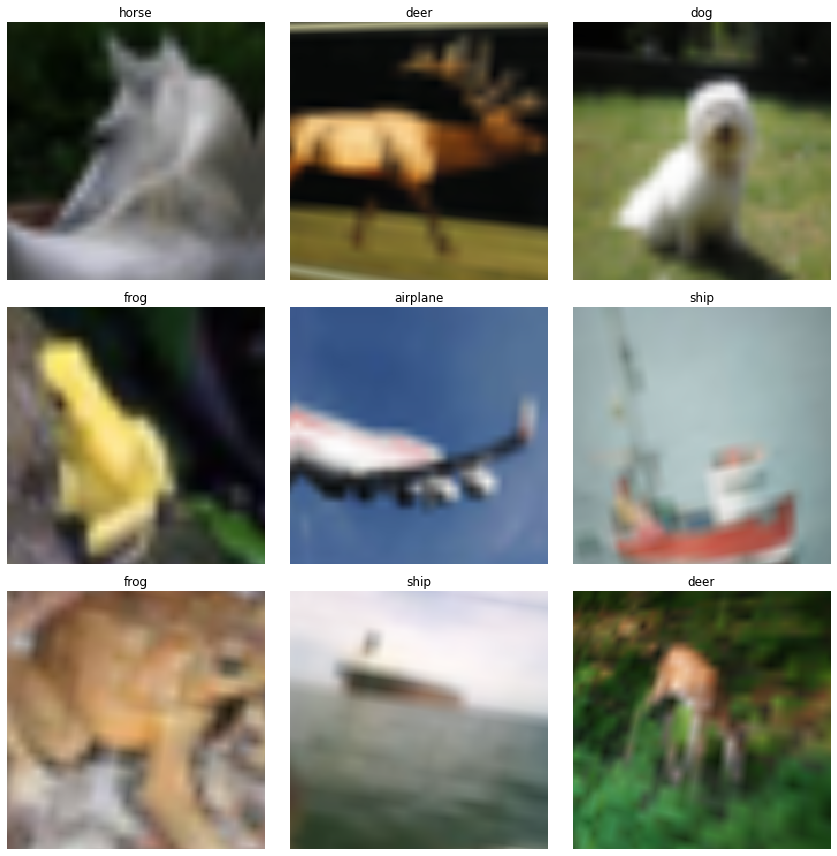

In [8]:
images.show_batch(rows=3,figszie=(5,5))

In [9]:
images.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [10]:
learn_object = vs.cnn_learner(images,base_arch=vs.models.resnet34,metrics=error_rate)

In [11]:
learn_object.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.793064,0.466595,0.160400,04:04
1,0.441249,0.260403,0.087700,02:53
2,0.335401,0.205359,0.070000,02:58
3,0.284526,0.176204,0.059900,02:55
4,0.246373,0.162103,0.056100,02:58
5,0.205613,0.147386,0.049400,02:55
6,0.208245,0.139794,0.047400,02:58
7,0.176871,0.139868,0.049200,02:55


In [12]:
learn_object.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


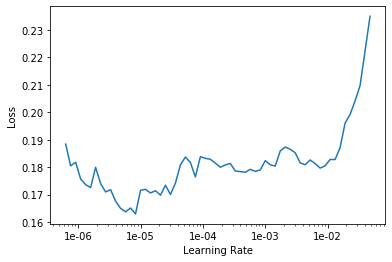

In [13]:
learn_object.recorder.plot()

In [14]:
interpret_object = vs.ClassificationInterpretation.from_learner(learn_object)

In [15]:
learn_object.save('cif_res34')

In [16]:
learn_object.unfreeze()

In [17]:
learn_object.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.398196,0.342886,0.115200,04:09
1,0.338870,0.386795,0.120100,04:11
2,0.181112,0.145312,0.050900,04:08
3,0.096560,0.108179,0.036000,04:07


In [6]:
learn_object = vs.cnn_learner(images,base_arch=vs.models.resnet50,metrics=error_rate)

In [7]:
learn_object.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.718002,0.412649,0.139100,03:04
1,0.383197,0.242821,0.082900,02:44
2,0.261663,0.181040,0.059500,02:44
3,0.217171,0.153844,0.052000,02:44
4,0.184065,0.144184,0.049200,02:44
5,0.160210,0.122924,0.040500,02:45
6,0.130607,0.120639,0.038600,02:44
7,0.125265,0.119171,0.039000,02:44


In [8]:
class_interpreter = vs.ClassificationInterpretation.from_learner(learn_object)

In [11]:
class_interpreter.most_confused(8)

[('cat', 'dog', 38),
 ('dog', 'cat', 35),
 ('automobile', 'truck', 25),
 ('truck', 'automobile', 22),
 ('horse', 'deer', 20),
 ('airplane', 'ship', 16),
 ('bird', 'cat', 15),
 ('deer', 'horse', 14),
 ('frog', 'cat', 14),
 ('deer', 'cat', 12),
 ('cat', 'deer', 11),
 ('dog', 'horse', 10),
 ('bird', 'airplane', 9),
 ('horse', 'cat', 9),
 ('bird', 'frog', 8)]